# Clustering Algorithms

##  Clustering Implementation


### Load the democracy index data set 

In [1]:
## Import all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd

## Load the dataset csv file
democracy_data_df = pd.read_csv('democracy_index.csv')

print(democracy_data_df.dtypes)
democracy_data_df.info()
democracy_data_df.duplicated().any()

#Get the first 5 rows of dataset and go through the columns to get the gist of the dataset
democracy_data_df.head()

Unnamed: 0                          int64
rank                               object
country                            object
democracy_index                   float64
electoral_processand_pluralism    float64
functioning_of_government         float64
political_participation           float64
political_culture                 float64
civil_liberties                   float64
category                           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      167 non-null    int64  
 1   rank                            167 non-null    object 
 2   country                         167 non-null    object 
 3   democracy_index                 167 non-null    float64
 4   electoral_processand_pluralism  167 non-null    float64
 5   functioning_of_government    

,Unnamed: 0,rank,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category
0,0,1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy
1,1,2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy
2,2,3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy
3,3,4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy
4,4,5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy


###  Use the five categories to cluster countries into different regimes 

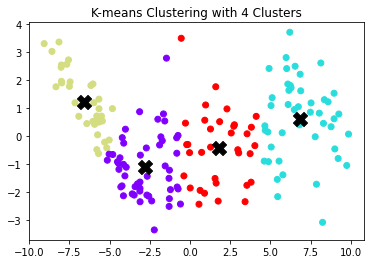

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


,Unnamed: 0,rank,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category,clusters
0,0,1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy,2
1,1,2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy,2
2,2,3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy,2
3,3,4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy,2
4,4,5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy,2
...,...,...,...,...,...,...,...,...,...,...,...
162,162,163,Chad,1.61,0.00,0.00,1.67,3.75,2.65,Authoritarian,1
163,163,164,Central African Republic,1.52,2.25,0.00,1.11,1.88,2.35,Authoritarian,1
164,164,165,Democratic Republic of the Congo,1.49,0.50,0.71,2.22,3.13,0.88,Authoritarian,1
165,165,166,Syria,1.43,0.00,0.00,2.78,4.38,0.00,Authoritarian,1


In [7]:
from sklearn.decomposition import PCA

## store a list of 5 columns(5 categories) in a dataset to variable "categories"

categories = democracy_data_df[['electoral_processand_pluralism', 'functioning_of_government', 'political_participation',
    'political_culture', 'civil_liberties']]



# Apply Principal Complonent Aanlysis(PCA) to reduce the dataset to 2 dimensions 
# As we are dealing with 5 columns , visualizing the data is challenging. 
# PCA helps to reduce the data to 2 dimensions and makes it easier to visualize the data. 
# fit_transform() computes the mean and the variance for scaling and transform will reduce the dimensionality of 
# the dataset ('categories') 


## initializes a PCA object from the scikit-learn library
## n_components=2 means that the algorithm will reduce the data down to 2 dimensions

pca = PCA(n_components=2)
data_pca = pca.fit_transform(categories)

# Fit KMeans with 4 clusters
# fit_predict() models the data and obtain the cluster labels for each data point in one step.

kmeans = KMeans(n_clusters=4, random_state=42)
clusters=kmeans.fit_predict(data_pca)

# Get cluster labels and add new column 'clusters' to the democracy_data_df
democracy_data_df['clusters'] = kmeans.labels_


# Plotting the clusters and their centers
plt.scatter(data_pca[:, 0], data_pca[:, 1],
           c =clusters, cmap='rainbow')

# s is the size of marker set to 200
# c is the color of marker  set to black
# marker is set to 'X'

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200,c='black', marker='X')
plt.title("K-means Clustering with 4 Clusters")
plt.show()
print(clusters)


democracy_data_df.describe()
democracy_data_df.head(200)

###  Preprocess the data (if necessary), such as normalizing or scaling the features 
**a:** Find out why we need to maintain a uniform scale across the variables for K-means and Hierarchical clustering  
**b:** Do we need to use scaling techniques for this dataset? 


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_df =scaler.fit_transform(data_pca)

print("Scaled Dataset Using StandardScaler")
scaled_df


## a. k-means & hierarchical clustering relies on distance based measures to group similar data 
## points(Eucledian distance, Manhattan distance)
## When features have different scales , it can distort the result by incorrectly calculating the results.

## There are two types of scalers : Minmax scaler() and Standard scaler()
## By scaling the data all features can be brought to samescale typically with mean 0 and variance 1 
## (Standard Scaler), or within a specific range (MinMax Scaler).This ensures that each feature
## contributes equally to the distance calculation, leading to more accurate clustering.

## b. Yes we need to use scaling techniques for this dataset.

Scaled Dataset Using StandardScaler


array([[-1.74435312,  2.16168364],
       [-1.65108262,  1.98005735],
       [-1.56715003,  2.19931884],
       [-1.60323703,  1.15279757],
       [-1.53751599,  1.6629591 ],
       [-1.47291597,  1.68006701],
       [-1.54149768,  1.60888308],
       [-1.53799187,  1.28084288],
       [-1.53417473,  1.24293189],
       [-1.45321566,  1.78162348],
       [-1.43424167,  1.26696669],
       [-1.44280134,  1.16265767],
       [-1.37557448,  0.77803047],
       [-1.28276165,  0.74224694],
       [-1.32971059,  0.46344319],
       [-1.23403607,  0.29267287],
       [-1.18527513,  1.18316656],
       [-1.16041446,  1.21978779],
       [-1.11511591,  0.47121113],
       [-1.16211255,  0.3449392 ],
       [-1.08849017,  0.63990834],
       [-1.08925262,  0.86366508],
       [-1.15024418,  0.77895415],
       [-1.14074265,  0.27583973],
       [-1.05967213,  0.46871759],
       [-1.08734046,  0.32855212],
       [-1.10494563,  0.03037749],
       [-1.04802975,  0.35360372],
       [-1.09379688,

###  Implement K-means clustering to categorize the data into clusters 
**a:** Use elbow method to determine number of clusters   
**b:** Verify if the solution offered by the elbow method and the actual soultion (number of regimes) match   
**c:** Do we need to use elbow method to detrmine number of clusters for this dataset?   


[334.0, 197.99522276183575, 107.67922495176495, 81.94649673563237, 61.00664649424593, 49.27302112000975, 41.91091962024128, 35.42127421180112, 31.419914447854143, 27.656634506949462]


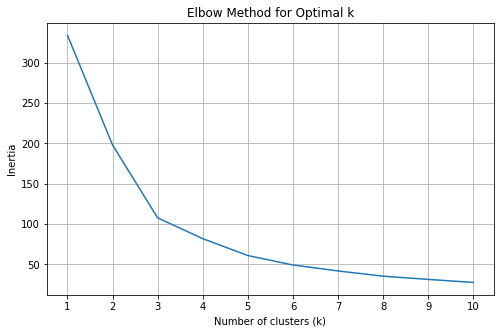

In [5]:
## a. Elbow method

## it defines the range of the k-values i.e. the number of clusters to be tested from 1 to 4

k_values = range(1,11)

## initalizes aqn empty list called inertia
## inertia measures within cluster sum of the squares.
## it measures how spread out the clusters are

inertia=[]

## for loop is used and it will iterate over k_values(1,2,3,4)
## n_clusters=k specifies the number of clusters to form
## fit() method trains the model on the scaled_df 
## After fitting, the K-Means algorithm assigns each data 
## point in scaled_df to one of the clusters based on the current value of k.

for k in k_values:
    kmeans = KMeans(n_clusters =k, random_state= 40)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    
print(inertia)

#plot the elbow method result

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, markersize=8 )
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)  # Set x-ticks to k values for clarity
plt.grid()
plt.show()


## b. As per the elbow method,optimal number of clusters ranges between 3 and 5 , so we can conclude 
## that number of regimes i.e. 4 matches with the solution offered by elbow method.

## c. elbow method confirms the optimal number of clusters .
## It helps in  preventing overfitting/underfitting in clustering models.

###  Implement Hierarchical clustering using an appropriate linkage method 
**a:** Try different linkage criteria 

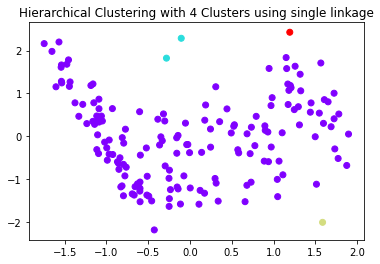

In [7]:
from sklearn.cluster import AgglomerativeClustering

# Using Agglomerative Clustering for hierarchical clustering using single linkage

agg_clustering_single = AgglomerativeClustering(n_clusters=4, linkage='single')
agg_clusters_single = agg_clustering_single.fit_predict(scaled_df)

# Plotting the clusters
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=agg_clusters_single, cmap='rainbow')
plt.title("Hierarchical Clustering with 4 Clusters using single linkage")
plt.show()


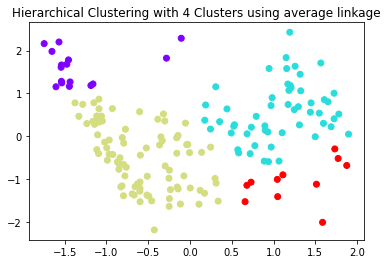

In [8]:
# Using Agglomerative Clustering for hierarchical clustering using average linkage

agg_clustering_complete = AgglomerativeClustering(n_clusters=4, linkage='average')
agg_clusters_complete = agg_clustering_complete.fit_predict(scaled_df)

# Plotting the clusters
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=agg_clusters_complete, cmap='rainbow')
plt.title("Hierarchical Clustering with 4 Clusters using average linkage")
plt.show()


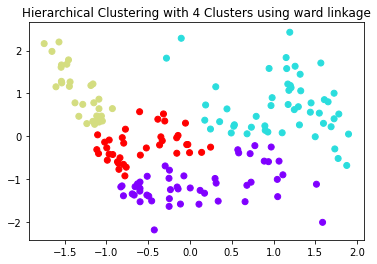

In [9]:
# Using Agglomerative Clustering for hierarchical clustering ward linkage

agg_clustering_ward = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_clusters_ward = agg_clustering_ward.fit_predict(scaled_df)

# Plotting the clusters
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=agg_clusters_ward, cmap='rainbow')
plt.title("Hierarchical Clustering with 4 Clusters using ward linkage")
plt.show()




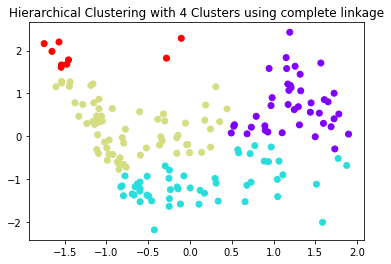

In [10]:
# Using Agglomerative Clustering for hierarchical clustering ward linkage

agg_clustering_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
agg_clusters_complete = agg_clustering_complete.fit_predict(scaled_df)

# Plotting the clusters
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=agg_clusters_complete, cmap='rainbow')
plt.title("Hierarchical Clustering with 4 Clusters using complete linkage")
plt.show()



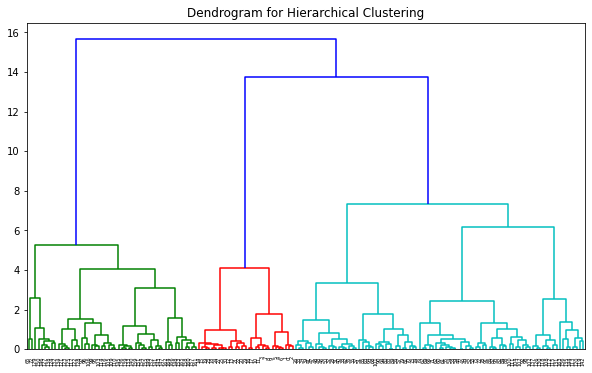

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generating a dendrogram
linked = linkage(scaled_df, 'ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top')
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()


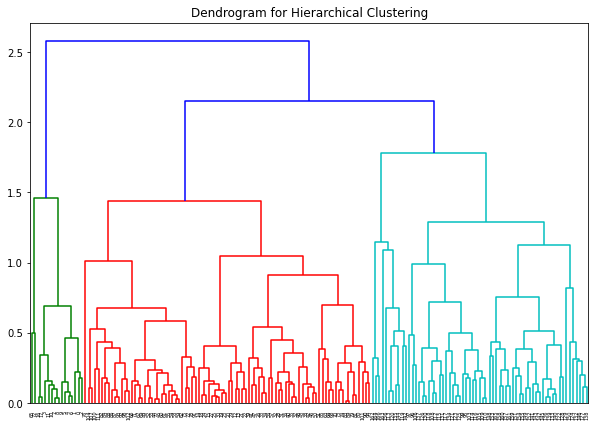

In [55]:
# Generating a dendrogram
linked = linkage(scaled_df, 'average')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top')
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()


### Plot the democracy index values

For aforementioned methods generate the clustering solution. The clustering solution simply groups the countries into different groups   
based on similarity. Once the solution is obtained, plot density plots of democracy index values considering all the countries within a group. 


In [21]:

democracy_data_df.head(200)


,Unnamed: 0,rank,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category,clusters
0,0,1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy,2
1,1,2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy,2
2,2,3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy,2
3,3,4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy,2
4,4,5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy,2
...,...,...,...,...,...,...,...,...,...,...,...
162,162,163,Chad,1.61,0.00,0.00,1.67,3.75,2.65,Authoritarian,1
163,163,164,Central African Republic,1.52,2.25,0.00,1.11,1.88,2.35,Authoritarian,1
164,164,165,Democratic Republic of the Congo,1.49,0.50,0.71,2.22,3.13,0.88,Authoritarian,1
165,165,166,Syria,1.43,0.00,0.00,2.78,4.38,0.00,Authoritarian,1


Text(0.5, 1.0, 'Democracy index for the clusters')

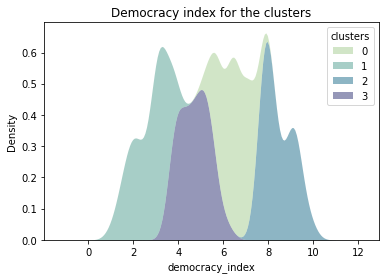

In [22]:

## new column 'clusters' is added to the democracy_data_df in task 2 
## 

import seaborn as sns
sns.kdeplot(data=democracy_data_df, x="democracy_index", hue="clusters", multiple="stack",
            fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)
plt.title("Democracy index for the clusters")

